In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
df.isnull().sum() #Bos verimiz yok.

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
failure_count = df['failure'].value_counts()
print("Class 1: ", failure_count[0])
print("Class 2: ", failure_count[1])
print("proportion: ", round(failure_count[0] / failure_count[1], 2),':1')

Class 1:  124388
Class 2:  106
proportion:  1173.47 :1


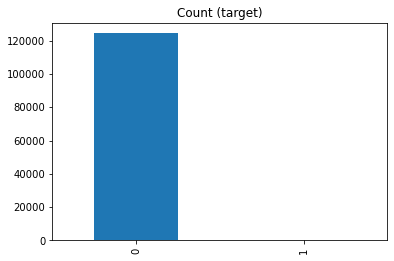

In [8]:
failure_count.plot(kind='bar',title='Count (target)');

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
labels=df.columns[3:]

In [11]:
x=df[labels]
y=df['failure']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [13]:
xgb=XGBClassifier()

In [14]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
y_pred=xgb.predict(x_test)

In [16]:
accuracy=accuracy_score(y_test,y_pred)

In [17]:
accuracy

0.9990361058677055

In [18]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.90%


In [19]:
conf_mat =confusion_matrix(y_true=y_test,y_pred=y_pred)

In [20]:
print("Confusion Matrix: \n",conf_mat)

Confusion Matrix: 
 [[24875     4]
 [   20     0]]


C:\Users\melih\AppData\Local\Temp/ipykernel_33820/2218815820.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
C:\Users\melih\AppData\Local\Temp/ipykernel_33820/2218815820.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


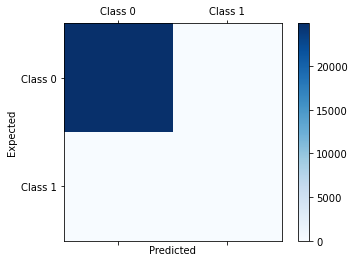

In [21]:
labels=['Class 0','Class 1']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

Resampling

In [22]:
#Class count
count_class_0, count_class_1 = df.failure.value_counts()

In [23]:
#Divide by class
df_class_0 = df[df['failure']==0]
df_class_1 = df[df['failure']==1]

Random Under-Sampling

In [24]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1],axis=0)

In [25]:
print("Random under-sampling")
print(df_test_under.failure.value_counts())

Random under-sampling
0    106
1    106
Name: failure, dtype: int64


<AxesSubplot:title={'center':'Count (Failure)'}>

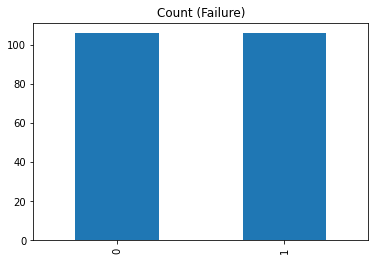

In [26]:
df_test_under.failure.value_counts().plot(kind='bar',title="Count (Failure)")

Random over-sampling

In [27]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)

In [28]:
print("Random over-sampling: ")
print(df_test_over.failure.value_counts())

Random over-sampling: 
0    124388
1    124388
Name: failure, dtype: int64


<AxesSubplot:title={'center':'count(failure)'}>

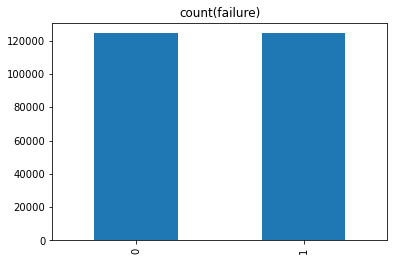

In [29]:
df_test_over.failure.value_counts().plot(kind='bar',title="count(failure)")

In [30]:
import imblearn

In [36]:
from sklearn.datasets import make_classification

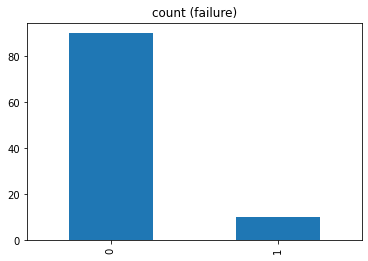

In [38]:
x, y=make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y = 0, n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)
    
df=pd.DataFrame(x)
df['failure'] = y
df.failure.value_counts().plot(kind='bar', title= 'count (failure)');

In [41]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [42]:
from sklearn.decomposition import PCA

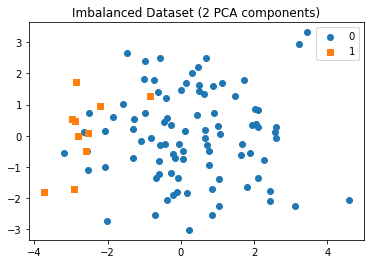

In [43]:
pca= PCA(n_components=2)
x=pca.fit_transform(x)

plot_2d_space(x,y,'Imbalanced Dataset (2 PCA components)')

In [58]:
#from imblearn.under_sampling import RandomUnderSampler

In [60]:
#rus = RandomUnderSampler(return_indices=True)
#X_rus, y_rus, id_rus = rus.fit_sample(X, y

#plot_2d_space(x_rus,y_rus, "Random Under Sampling")

In [64]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler()
#X_ros, y_ros = ros.fit_sample(X, y)

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')

#plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [67]:
#from imblearn.under_sampling import TomekLinks

#tl = TomekLinks(return_indices=True, ratio='majority')
#X_tl, y_tl, id_tl = tl.fit_sample(X, y)

#print('Removed indexes:', id_tl)

#plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [66]:
#from imblearn.under_sampling import ClusterCentroids

#cc = ClusterCentroids(ratio={0: 10})
#X_cc, y_cc = cc.fit_sample(X, y)

#plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [69]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(ratio='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')